In [4]:
import math

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow_probability as tfp

from training import create_models
from models import Model, DefaultDenseModel, DefaultConvModel, McDropoutModel, BayesByBackpropModel
import commons

In [51]:
trainingset_proportion = 0.5
embedding_dim = 50
batch_size = 128
epochs = 50

glove_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/glove"
history_evaluation_folder = "D:/google drive/haw/master/mastertheisis/hauptprojekt/evaluation/history/"
models_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/training/models"
history_dir = "D:/google drive/haw/master/mastertheisis/hauptprojekt/training/history"

setup = commons.setup(glove_dir=glove_dir,
                      embedding_dim=embedding_dim,
                      trainingset_proportion=trainingset_proportion)
models = create_models(setup, models_dir, history_dir)

Found 400000 word vectors.
17361/88587 unknown words


Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


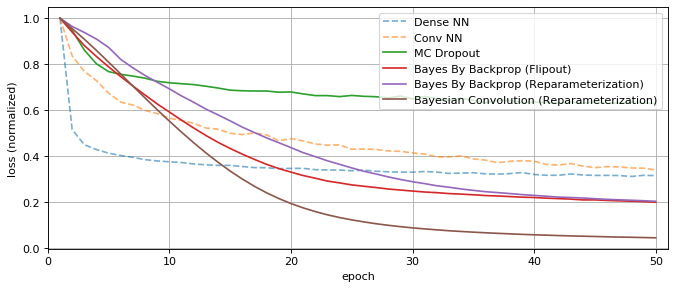

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


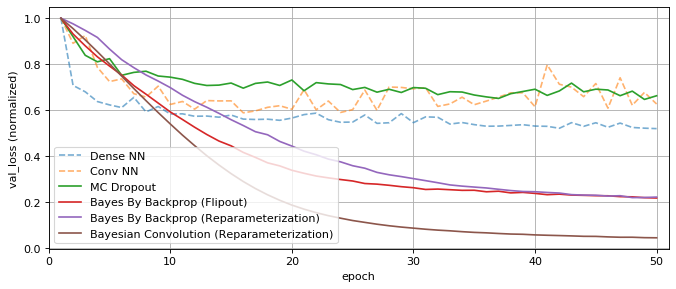

using saved model
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


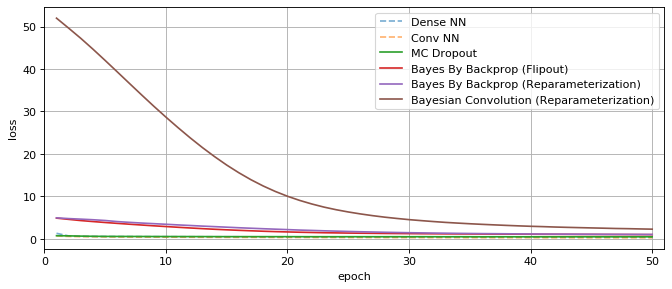

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


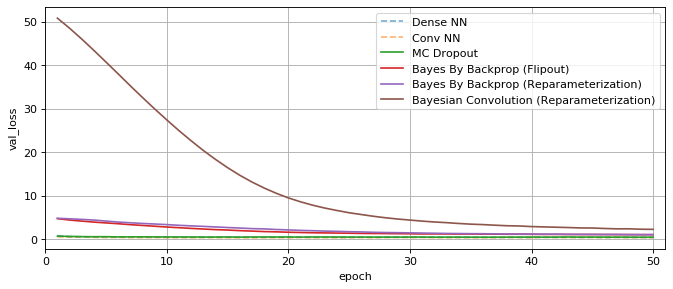

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


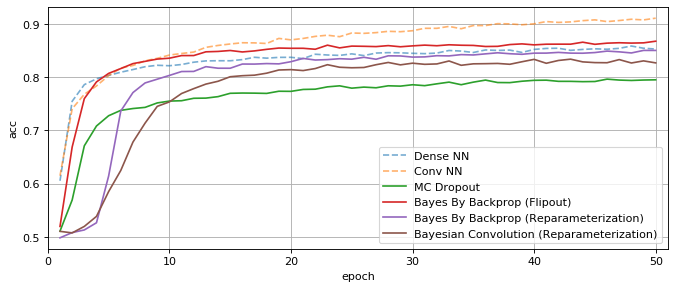

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


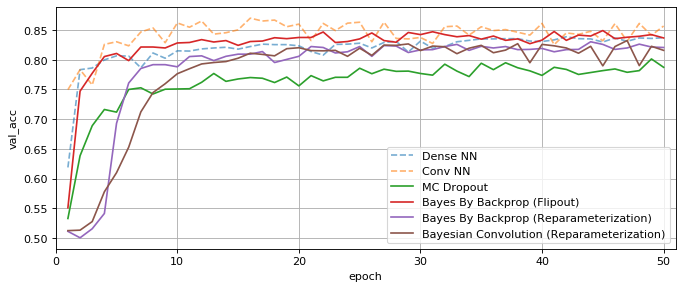

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


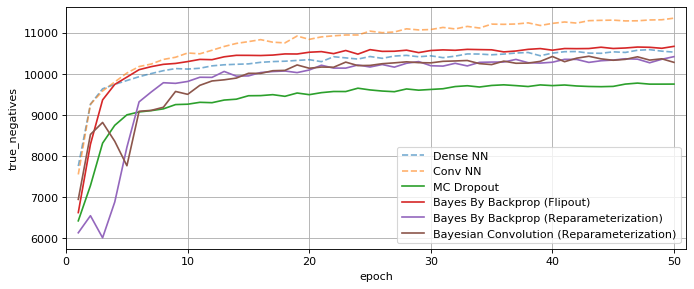

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


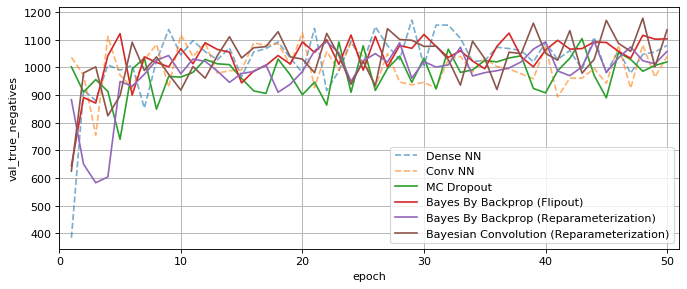

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


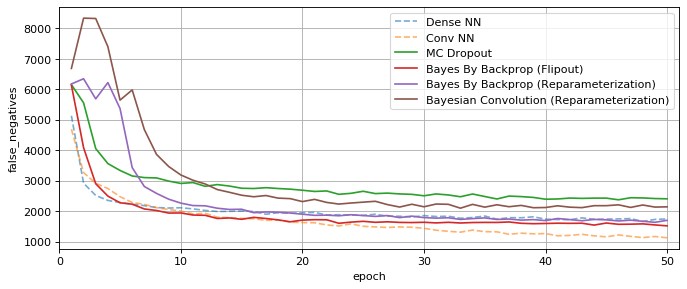

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


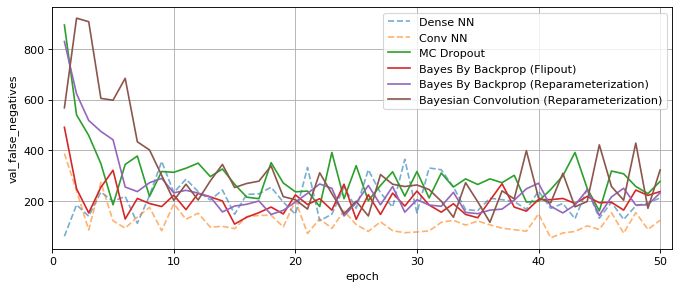

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


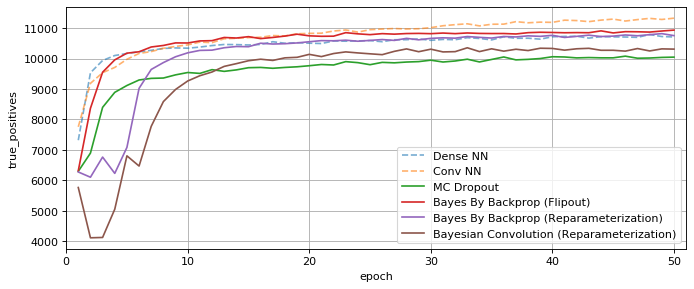

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


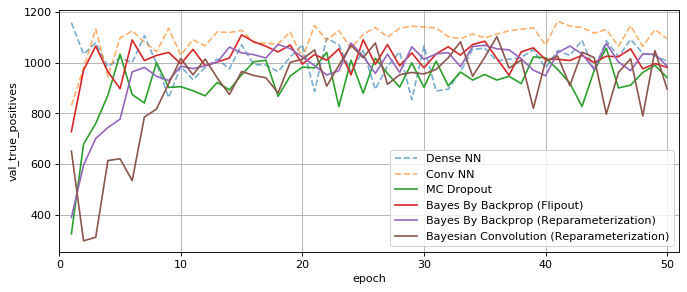

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


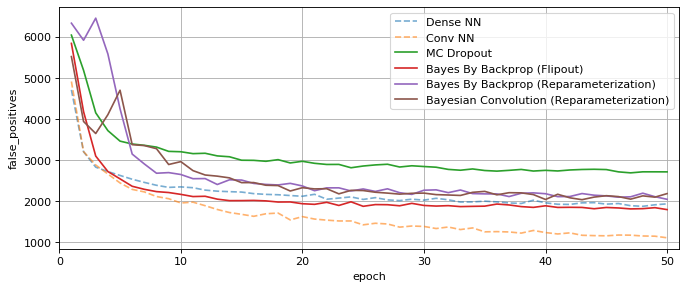

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


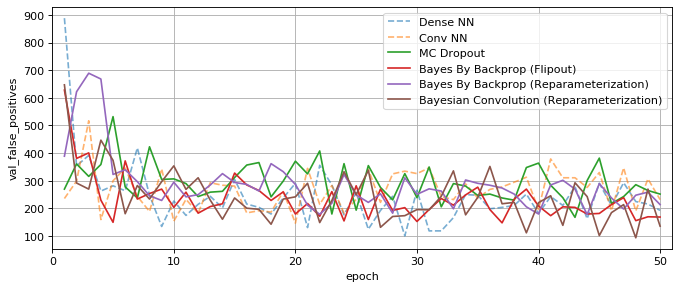

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


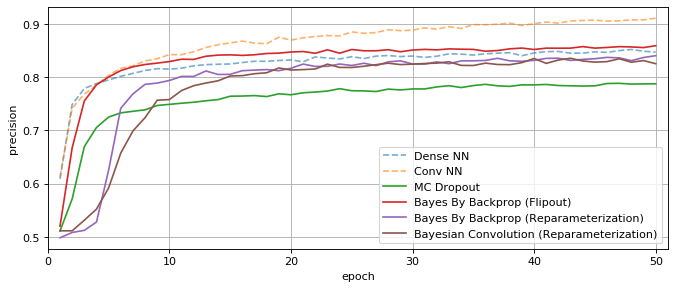

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


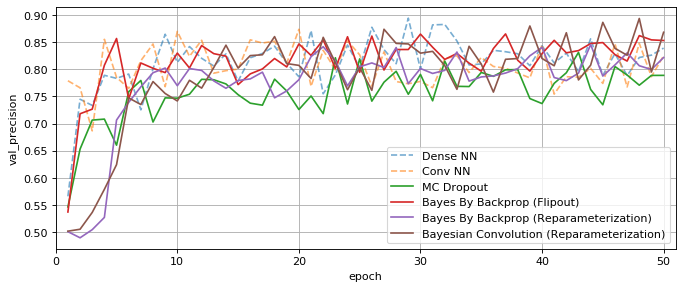

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


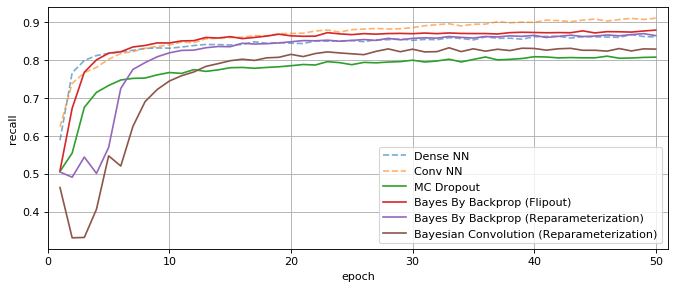

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


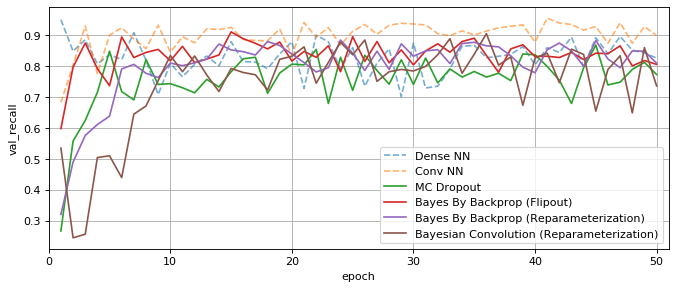

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


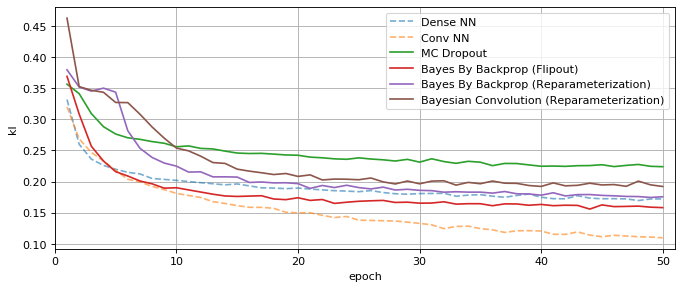

Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50


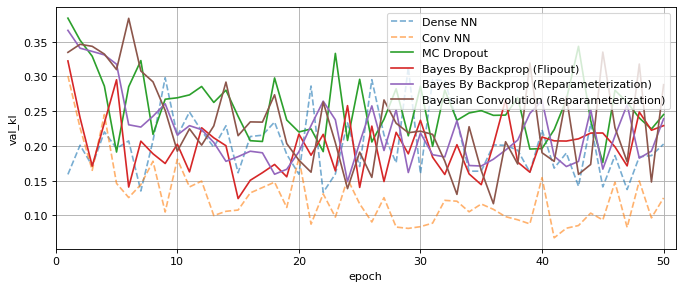

In [55]:
# evaluate history
def plot_metric(col_name, is_training=True, normalize=False):
    figure(num=None, figsize=(10, 4), dpi=80)

    for model in models:
        (history, last_epoch) = model.load_history()
        y_label = col_name

        if is_training:
            col = col_name
        else:
            col = "val_%s" % col_name
            y_label = col

        if normalize:
            norm_factor = 1./np.max(history[col][:50])
            y_label += (" (normalized)")
        else:
            norm_factor = 1.
            
        if model.is_variational():
            linestyle = "-"
            alpha = 1.0
        else:
            alpha = 0.6
            linestyle = "--"
            
        plt.plot(np.arange(1, epochs + 1, 1), history[col][:50] * norm_factor, alpha=alpha, linestyle=linestyle)


    plt.legend([model.readable_name() for model in models])
    plt.xlabel("epoch")
    plt.ylabel(y_label)
    plt.xlim([0, epochs + 1])
    plt.grid()
    plt.savefig(history_evaluation_folder + str(int(models[0].N)) + "_" + col + ".pdf")
    plt.show()


plot_metric("loss", True, normalize=True)
plot_metric("loss", False, normalize=True)

metric_names =  models[0].load_model().metrics_names
for metric in metric_names:
    plot_metric(metric, True)
    plot_metric(metric, False)


In [88]:
x_test, y_test = commons.load_imdb(0.25)[1]
x_test_padded = commons.pad_input(x_test, words_per_sentence)

In [45]:
metric_names = list(map(lambda metric: "val_%s" % metric, models[0].load_model().metrics_names))
dataset_sizes=[0.5, 0.4, 0.3, 0.2, 0.1, 0.05, 0.005]
Nx = []
Ny_histories = []
for dataset_size in dataset_sizes:
    setup = commons.setup(glove_dir=glove_dir,
                      embedding_dim=embedding_dim,
                      trainingset_proportion=dataset_size)
    models = create_models(setup, models_dir, history_dir)
    
    Nx += [models[0].N]
    Ny_histories += [[model.load_history()[0] for model in models]]

using saved model
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
17361/88587 unknown words
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Loaded history successfully. Last epoch: 50
Found 400000 word vectors.
1736

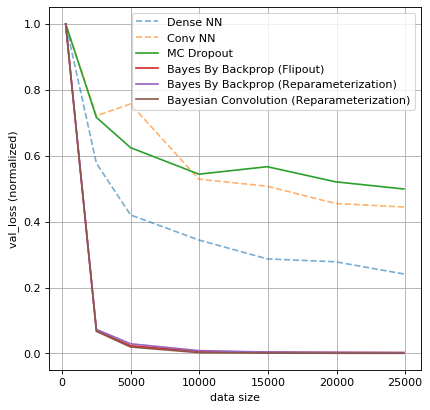

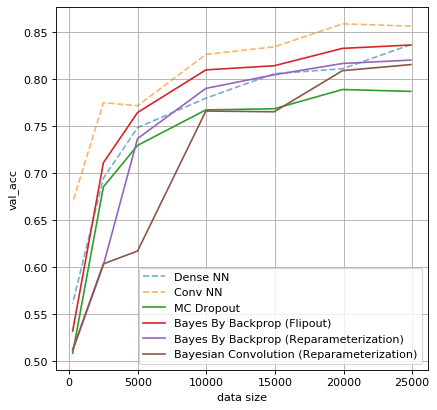

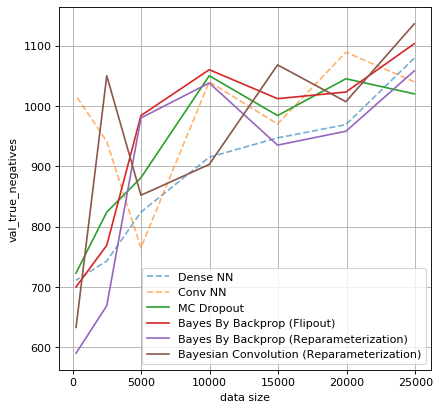

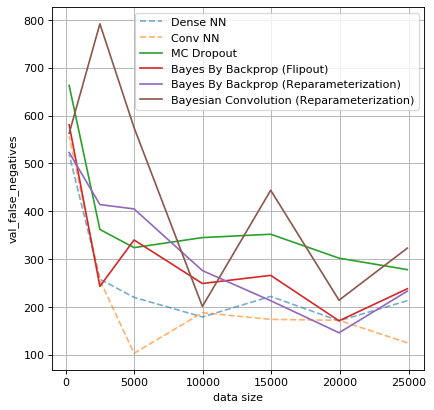

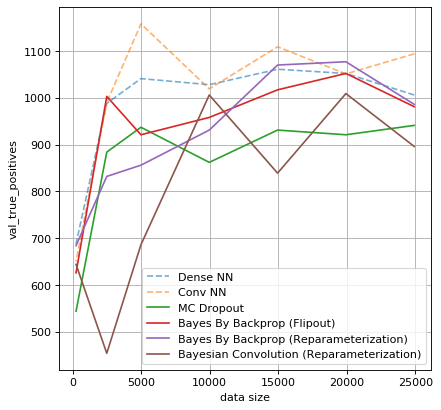

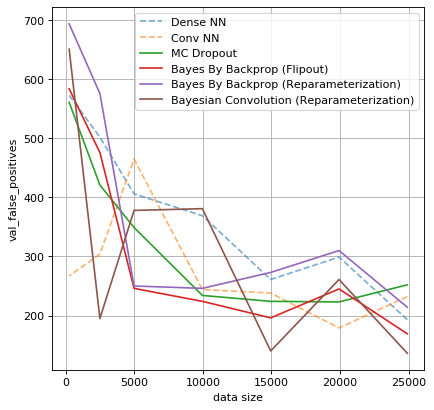

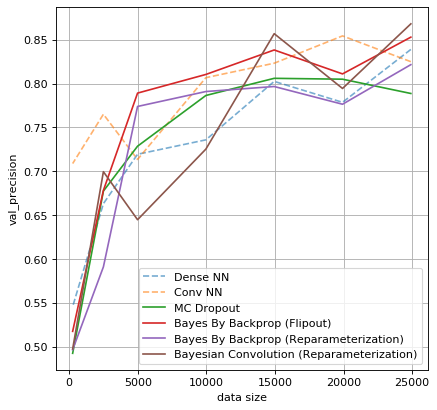

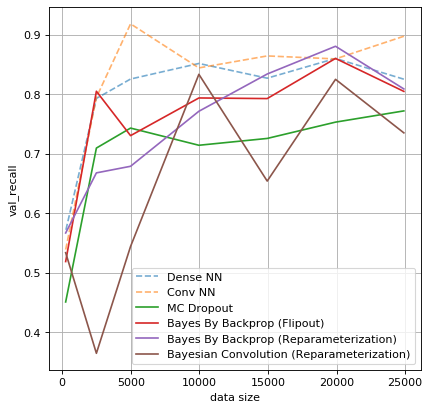

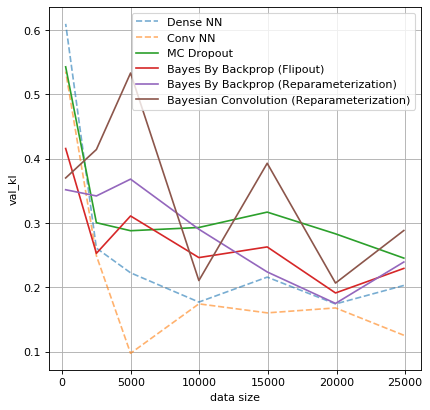

In [49]:
for metric in metric_names:
    figure(num=None, figsize=(6, 6), dpi=80)
    
    for m in range(len(models)):
        model = models[m]
        y_label = metric

        if model.is_variational():
            linestyle = "-"
            alpha = 1.0
        else:
            alpha = 0.6
            linestyle = "--"
            
        norm_factor = 1.
        Ny = []
        for history in Ny_histories:
            col = history[m][metric]
            Ny += [col.iloc[-1]]
            
        if metric == "loss" or metric == "val_loss":
            norm_factor = 1./np.max(Ny)
        plt.plot(Nx, np.array(Ny) * norm_factor, alpha=alpha, linestyle=linestyle)   
        
    if metric == "loss" or metric == "val_loss":
        y_label += (" (normalized)")
        
    plt.legend([model.readable_name() for model in models])
    plt.xlabel("data size")
    plt.ylabel(y_label)
    plt.grid()
    plt.savefig(history_evaluation_folder + metric + "_varrying_n" + ".pdf")
    plt.show()